In [11]:
import numpy as np
from scipy.integrate import odeint

import matplotlib.pyplot as plt
from matplotlib import animation, patches

## Set the initial parameters for the double pendulum:

theta1 and theta2 are $\theta_1$ and $\theta_2$ respectively, and v1 and v2 are $\dot{\theta}_1$ and $\dot{\theta}_2$ respectively. 

The masses and lengths can also be set.

In [12]:
m1, m2 = 1, 1.2
l1, l2 = 0.7, 0.7

t1, t2 = np.pi, -np.pi/2
w1, w2 = 0, 0

### Main code

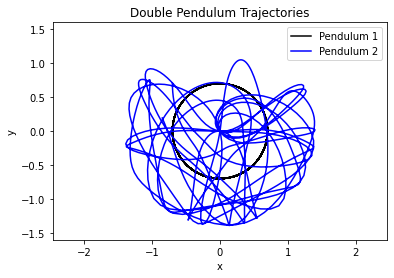

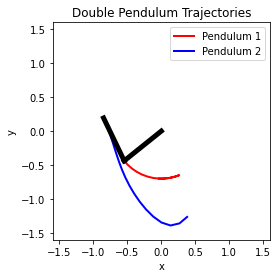

In [13]:
def deriv(y, t, m, l):
    
    g = 9.81
    k = 0.01
    
    m1, m2 = m
    l1, l2 = l
    t1, w1, t2, w2 = y.copy()
    
    dydt = [0, 0, 0, 0]
    dydt[0] = w1
    dydt[2] = w2
    
    dydt[1] = m2*g*np.sin(t2)*np.cos(t1-t2)-m2*np.sin(t1-t2)*(l1*w1**2*np.cos(t1-t2)+l2*w2**2)-(m1+m2)*g*np.sin(t1)
    #k = 0.01
    # Damping due to friction
    # dydt[1] += 2*k*w1 - 2*k*w2*np.cos(t1-t2)
    dydt[1] /= l1*(m1 + m2*(np.sin(t1-t2))**2)
    dydt[3] = (m1 + m2)*(l1 * w1**2*np.sin(t1-t2)-g*np.sin(t2) + \
                         g*np.sin(t1)*np.cos(t1-t2)) + m2*l2*w2**2*np.sin(t1-t2)*np.cos(t1-t2) 
    # Damping due to friction
    # dydt[3] += 2*k*w1*np.cos(t1-t2) - 2*(m1+m2)/m2 * k*w2
    dydt[3] /= l2*(m1 + m2*(np.sin(t1-t2))**2)
    
    return dydt

# Solving the ODE

t = np.linspace(0, 20, 1000)
init = [t1, w1, t2, w2]
sol = odeint(deriv, init, t, args=([m1, m2], [l1, l2],))

t1, w1, t2, w2 = sol.T

x1, x2 = l1*np.sin(t1), l1*np.sin(t1)+l2*np.sin(t2)
y1, y2 = -l1*np.cos(t1), -l1*np.cos(t1)-l2*np.cos(t2)

# Plotting the trajectories

plt.figure(4)
plt.plot(x1, y1, c = 'k', label = 'Pendulum 1')
plt.plot(x2, y2, c = 'b', label = 'Pendulum 2')
plt.axis('equal')
plt.title('Double Pendulum Trajectories')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.xlim([-(l1 + l2 + 0.2), (l1 + l2 + 0.2)])
plt.ylim([-(l1 + l2 + 0.2), (l1 + l2 + 0.2)])
plt.show(4)

# Animating the pendulum

fig = plt.figure(5)
ax = plt.axes(xlim = (-(l1 + l2 + 0.2), (l1 + l2 + 0.2)), ylim = (-(l1 + l2 + 0.2), (l1 + l2 + 0.2)))
ax.set_aspect('equal', 'box')
plt.title('Double Pendulum Trajectories')
plt.xlabel('x')
plt.ylabel('y')

line1, = ax.plot([], [], lw = 2, c = 'r')
line2, = ax.plot([], [], lw = 2, c = 'b')
line3, = ax.plot([], [], lw = 5, c = 'k')
line4, = ax.plot([], [], lw = 5, c = 'k')

line1.set_label('Pendulum 1')
line2.set_label('Pendulum 2')

circle1 = patches.Circle([], radius = 20, color = 'k')
circle2 = patches.Circle([], radius = 20, color = 'k')

ax.legend()

def init():
    line1.set_data([], [])
    line2.set_data([], [])
    line3.set_data([], [])
    line4.set_data([], [])
    circle1.set(center = [])
    circle2.set(center = [])
    
    
    return line1, line2, line3, line4, circle1, circle2

def animate_new(i):
    
    line1.set_data(x1[i:max(1,i-20):-1],y1[i:max(1,i-20):-1])
    line2.set_data(x2[i:max(1,i-20):-1],y2[i:max(1,i-20):-1])
    line3.set_data([0, x1[i]], [0, y1[i]])
    line4.set_data([x1[i], x2[i]], [y1[i], y2[i]])
    
    circle1.set(center = (x1[i], y1[i]))
    circle2.set(center = (x2[i], y2[i]))
    
    return line1, line2, line3, line4, circle1, circle2

animate = animation.FuncAnimation(plt.gcf(), animate_new, frames=len(t), init_func = init, interval = 20, blit = True)
animate.save('double_pendulum.gif', writer='imagemagick', fps=30)